# min $\Delta R_{jj}^{HC1}$ Comparisons

Ok, so I've been doing a lot of studies with this new min $\Delta R_{jj}^{HC1}$, so I kind of want to wrap it up here with some comparison plots for 

1. The $\kappa_\lambda$ scan for these different categories
2. Just the SM NR signal for these different pairing categories
3. How *combining* this with the $\Delta \eta_{hh}$ info helps

I'm super excited about seeing the answer to the first option b/c it will give me a clue how the new pairing performs for the NR signals at low $m_{4j}$, and I think the 2nd is just going to be a really nice summary plot to have.

With the $3^{rd}$ option, this is something that *literally* everybody has been suggesting that I try, and I think it's a good idea to see how my anlaysis improvements combine together. Jana also wanted me to try to optimize the $\Delta \eta_{hh}$ bins to optimize our sensitivity.



**New goal:**  Ok, so I think I already looked at option 1 and 2 in the `Valid-Pairings-Categories ` notebook, so here I really want a handle on how the background systematic impacts the uncertainty.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import uproot
import pickle
import json

import os
os.sys.path.append('../../hh4b-background-estimation/hep_ml')
from hep_ml import reweight

os.sys.path.append('../code')
from plotting import sig_bkg_massplanes, bkg_2bsameHC_massplanes, bkg_2b_rw_massplanes
from plotting import cf_1d_dists, plot_results, invert_interval
from plotting import SR_x,SR_y1,SR_y2,CR_x,CR_y1,CR_y2,SB_x,SB_y1,SB_y2

from AnalysisUtils import *

import pyhf 
from pyhf import Model, optimizer

%load_ext autoreload
%autoreload 2

Running w/ conda env: don't import root packages.


## Step 1: Load in the data and the reweighting BDTs

**Note:** I can probably speed up this nb by just loading in a part of the full dataframe.

In [2]:
minR1_fileName = "../../hh4b-resolved-reconstruction/{}_topo16_min_Rjj_h1_vec.root"

minR1_smnr   = nanoToDf(minR1_fileName.format("smnr"),ttree='fullmassplane')
minR1_data16 = nanoToDf(minR1_fileName.format("data16"),ttree='fullmassplane')

fullmassplane
fullmassplane


In [3]:
dataText = "$\mathbf{ATLAS}$ 2016 data\n"
#dataText += r"$\sqrt{s}$ = 13 TeV, $\mathcal{L}$ = 24.3 $fb^{-1}$"
dataText += "min $\Delta R_{jj}^{HC1}$: HC $p_T$ ordered"

Since the 2b $\rightarrow$ 4b extrapolation was derived *before* the $X_{wt}$ reweighting, I need to make sure that I'm retreiving this normalization as well.

In [4]:
minR1_BDT_fname = "myBDTs/BDT_d24_16_rel21_vec_min_dRjj_h1_vec.p"
minR1_reweighter = pickle.load(open( minR1_BDT_fname, "rb" ))

minR1_smnr_SB   = nanoToDf(minR1_fileName.format("smnr"),ttree='sideband')
minR1_data16_SB = nanoToDf(minR1_fileName.format("data16"),ttree='sideband')

minR1_N4bTo2b = np.sum((minR1_data16_SB.ntag>=4) & (minR1_data16_SB.kinematic_region==2)) \
                / np.sum((minR1_data16_SB.ntag==2) & (minR1_data16_SB.kinematic_region==2))


sideband
sideband


In [7]:
sort_rw_cols = ['pT_4', 'pT_2', 'eta_i', 'dRjj_1', 'dRjj_2', 'njets']

minR1_data16['w_2b_preXwt'] = minR1_N4bTo2b * minR1_reweighter.predict_weights(minR1_data16[sort_rw_cols])

Ok, I wasn't sure if I should also rederive the background estimate in the CR before $X_{wt}$, but I think since we were trying to test the extrapolation and worrying about bias induced by the stripes, it might be more honest to only compare to the CR after $X_{wt}$ so that our background systematic *includes* this systematic as well.

**Note:** In the meantime I should also compare to whether it is in fact better to derive the background estimate *before* $X_{wt}$.

For this, I can just use the `fullmasspne` and the getBDTWeights function that I wrote.


In [8]:
trainBDT=False

In [9]:
minR1_BDT_afterXwt = "myBDTs/BDT_d24_16_rel21_vec_min_dRjj_h1_afterXwt{}.p"

for tag,k in zip(['','CRderiv'],[2,1]):
    getBDTWeights(minR1_data16,minR1_BDT_afterXwt.format(tag),
                  trainBDT=trainBDT,kinematic_region=k)

**Compare in the SB**

In [81]:
makeBDTPlots=True

In [11]:
if makeBDTPlots:
    cf_1d_dists(minR1_data16,mask=(minR1_data16.kinematic_region==2),
                drawUnweighted=False, label="2b: SB derived weights", color_2b='navy',
                extra_w='w_2b_CR',extra_label="2b: CR derived weights",
                dataText=dataText,nbi=25,chi2Only=False,
                figDir='figures/vec_min_dRjj_h1/rw_2b_postXwt/',tag='_SB')

**Compare in the CR**

In [12]:
if makeBDTPlots:
    cf_1d_dists(minR1_data16,mask=(minR1_data16.kinematic_region==1),
                drawUnweighted=False, label="2b: SB derived weights", color_2b='navy',
                extra_w='w_2b_CR',extra_label="2b: CR derived weights",
                dataText=dataText,nbi=25,chi2Only=False,title='control region',
                figDir='figures/vec_min_dRjj_h1/rw_2b_postXwt/',tag='_CR')

**Question:** How can I prove that the issue is with the extrapolation?

I.e, if this is a trend, not just a fluctuation, couldn't the symmetrized variation not fully account for the variation? 

**Let's also compare to the w_2b from before $X_{wt}$**

1062673


../code/plotting.py:759: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar(x, n_4b / (N_4b * n_2b), yerr=np.sqrt(n_4b) / (N_4b * n_2b), fmt='.', color='k')
../code/plotting.py:765: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar(x, n_4b / (N_4b * n_2b_extra),
../code/plotting.py:766: RuntimeWarning: invalid value encountered in true_divide
  yerr=np.sqrt(n_4b) / (N_4b * n_2b_extra),


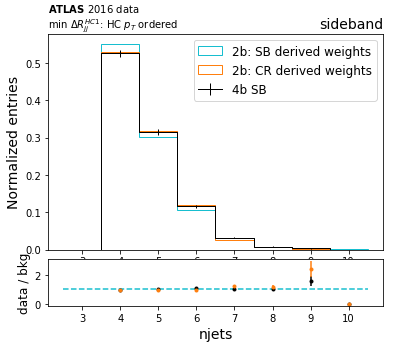

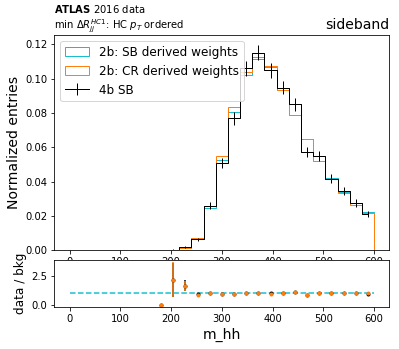

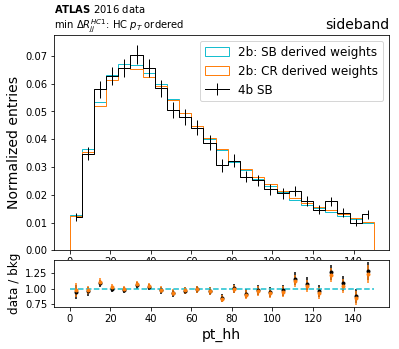

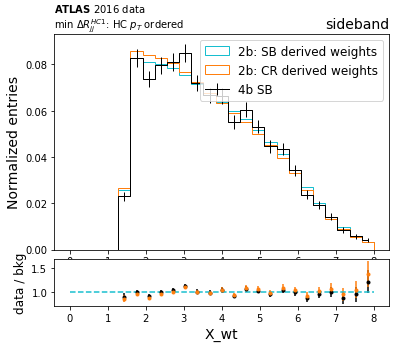

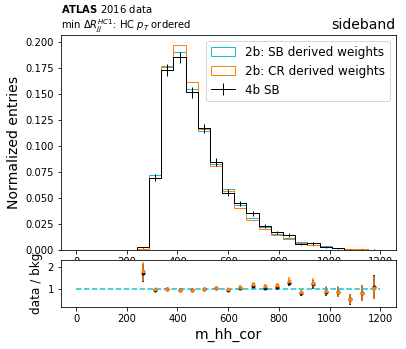

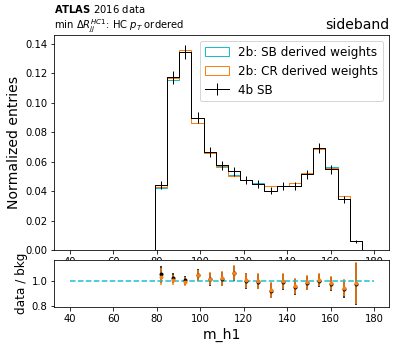

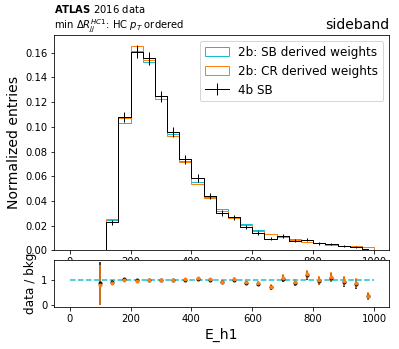

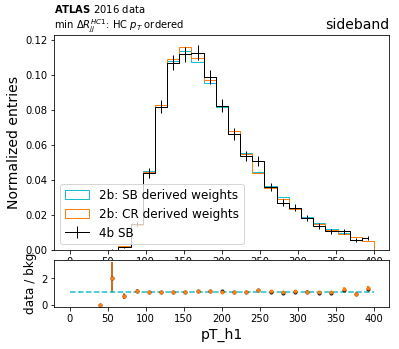

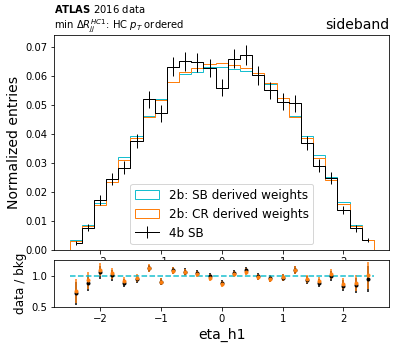

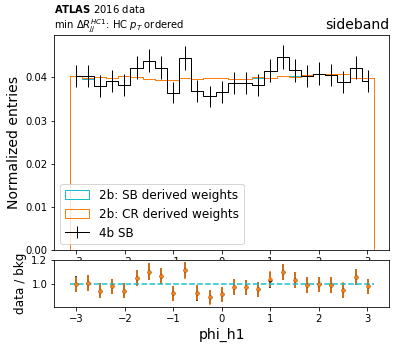

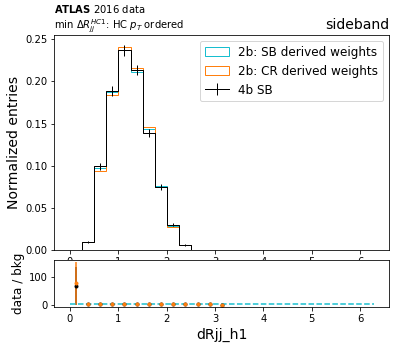

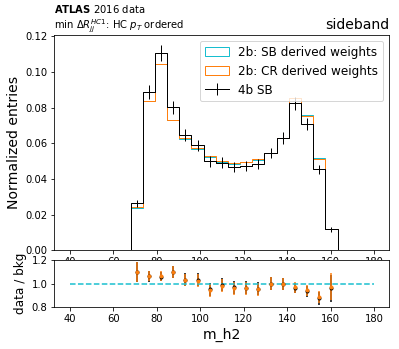

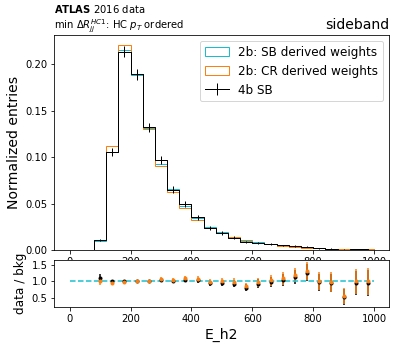

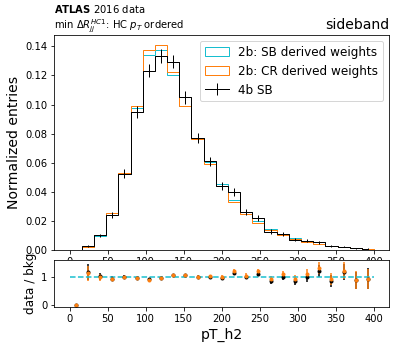

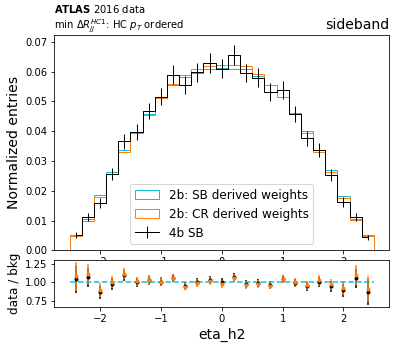

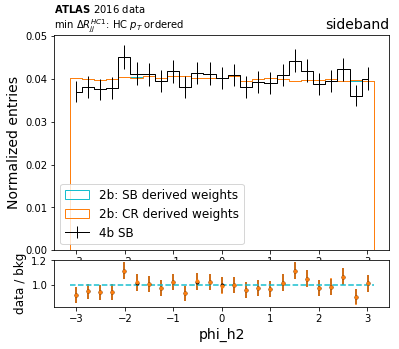

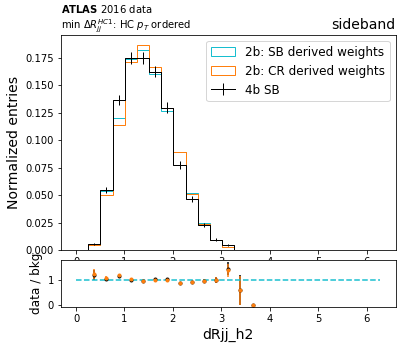

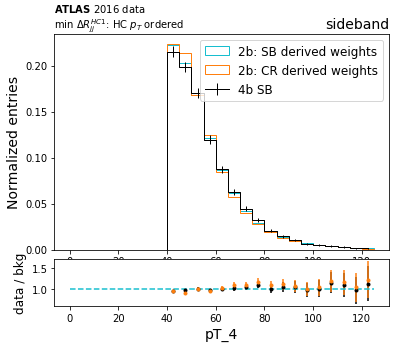

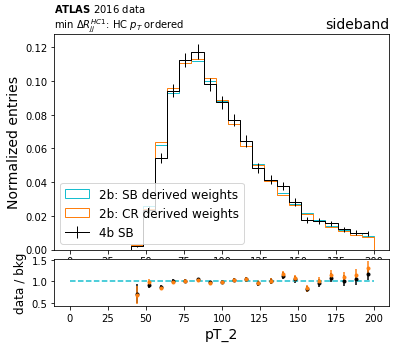

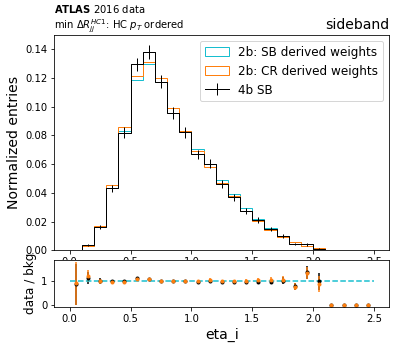

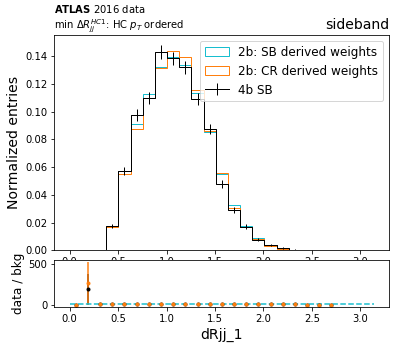

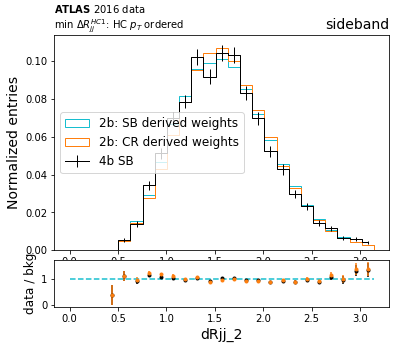

In [82]:
if makeBDTPlots:
    cf_1d_dists(minR1_data16,mask=(minR1_data16.kinematic_region==2),w2b='w_2b_preXwt',
                drawUnweighted=False, label="2b: SB derived weights",
                extra_w='w_2b_CR',extra_label="2b: CR derived weights",
                dataText=dataText,nbi=25,chi2Only=False,
                figDir='figures/vec_min_dRjj_h1/rw_2b_CRderiv/',tag='_SB')

570088


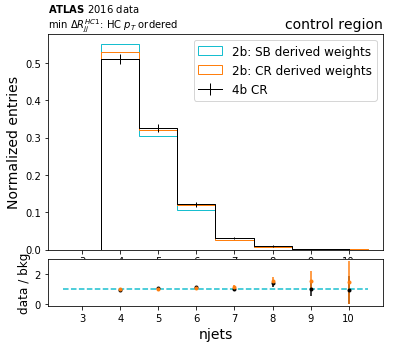

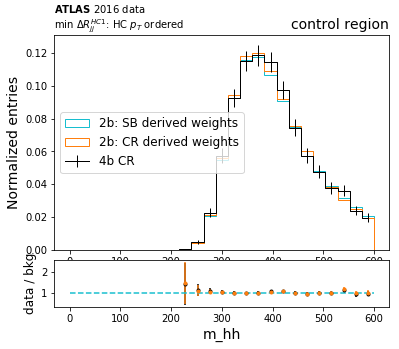

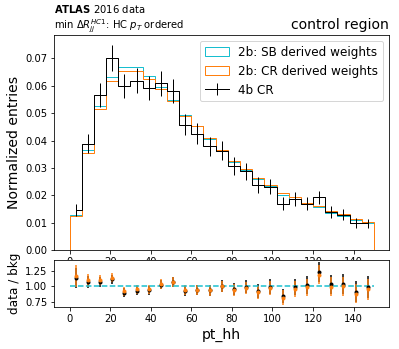

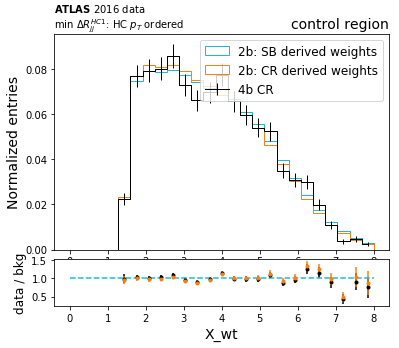

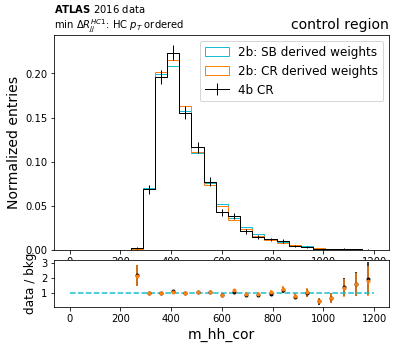

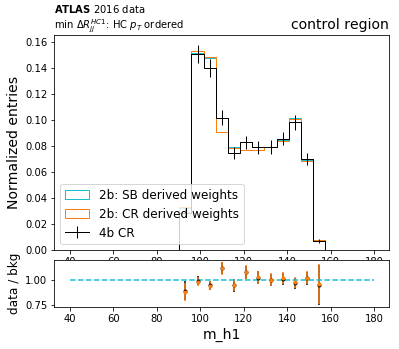

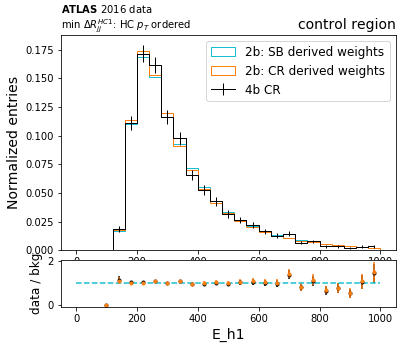

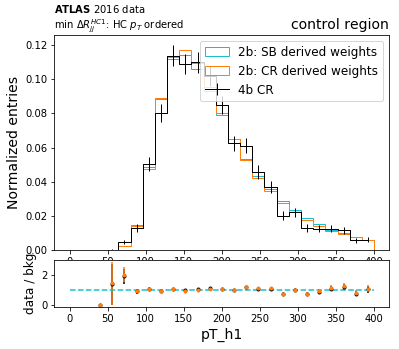

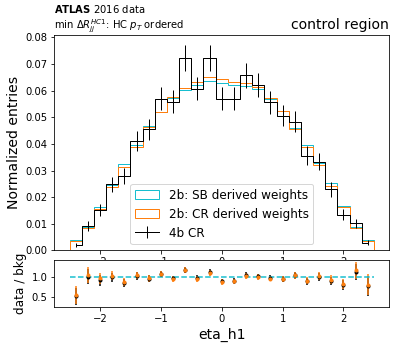

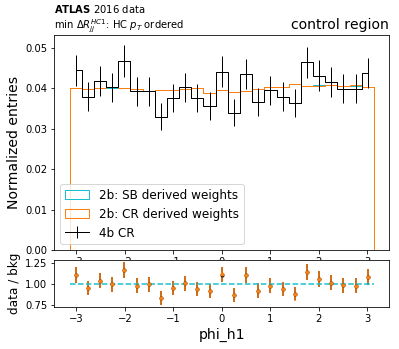

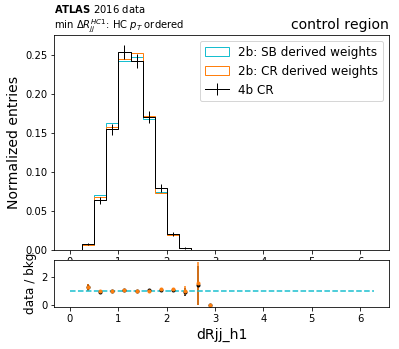

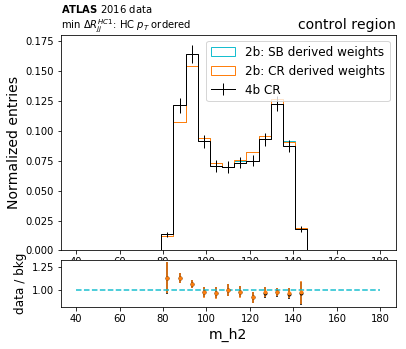

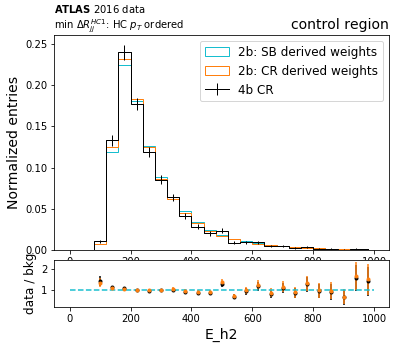

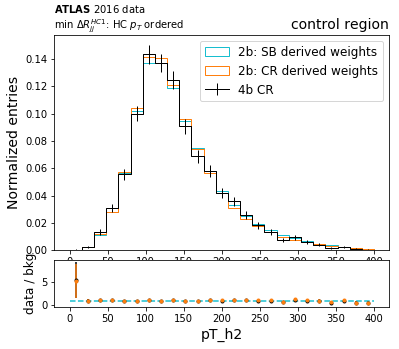

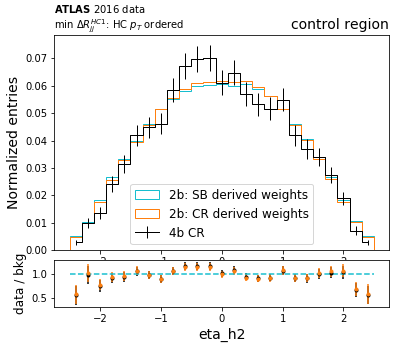

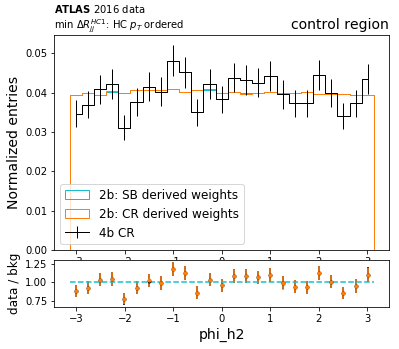

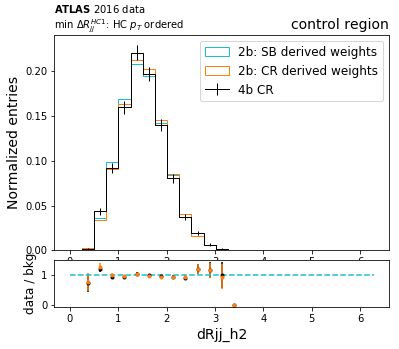

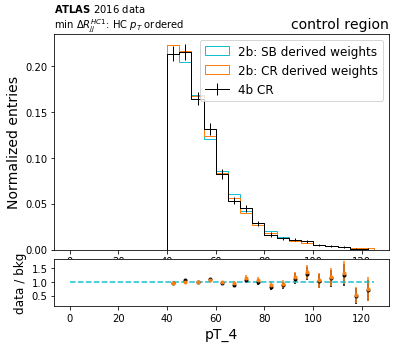

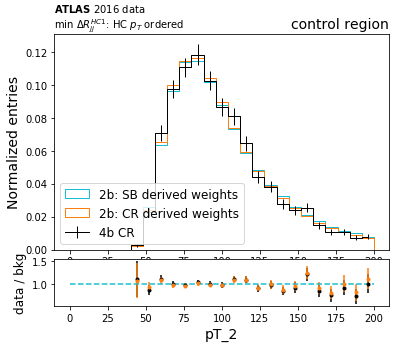

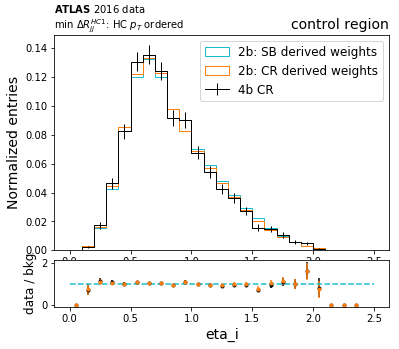

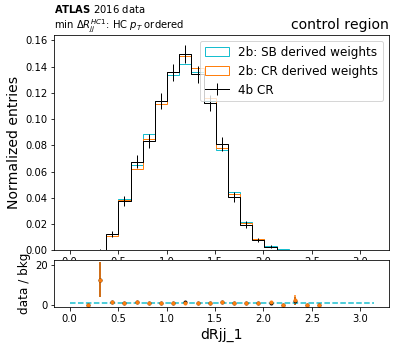

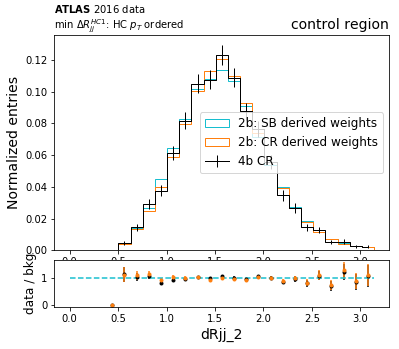

In [83]:
if makeBDTPlots:
    cf_1d_dists(minR1_data16,mask=(minR1_data16.kinematic_region==1),w2b='w_2b_preXwt',
                drawUnweighted=False, label="2b: SB derived weights", 
                extra_w='w_2b_CR',extra_label="2b: CR derived weights",
                dataText=dataText,nbi=25,chi2Only=False,title='control region',
                figDir='figures/vec_min_dRjj_h1/rw_2b_CRderiv/',tag='_CR')

## Step 2: Get background variation histograms

Ok, so the previous paper derived the $m_{hh}$ varied histograms in two different $H_T$ regions, above and below 300 GeV.

I need to add this variable to the df.


In [13]:
jpT_cols = [f'pT_h{hci}_j{ji}' for hci in [1,2] for ji in [1,2]]
minR1_data16['HT'] = np.sum(minR1_data16[jpT_cols], axis=1)

In [14]:
minR1_data16[['HT']].head()

HT
entry            
0      270.566002
1      232.465771
2      326.577900
3      311.956215
4      299.874660

Sanity check: What does $H_T$ look like?

In [15]:
sig_SR = (minR1_smnr.kinematic_region==0) & (minR1_smnr.ntag>=4)
bkg_SR = (minR1_data16.kinematic_region==0) & (minR1_data16.ntag==2)

edges = np.array([150, 250, 262, 275, 288, 302, 317, 332, 348, 365, 383, 402, 422, 443, 465, 488, 512, 
                  537, 563, 591, 620, 651, 683, 717, 752, 789, 828, 869, 912, 957,1004, 1054, 1106, 1161, 
                  1219, 1279, 1342, 1409, 1479, 1552, 1629, 1710, 1795, 1884, 1978, 2076])

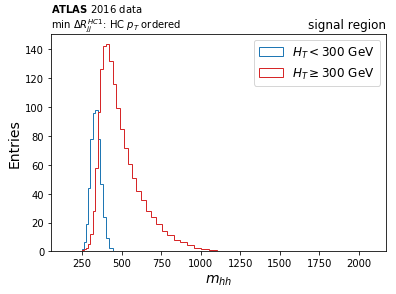

In [16]:
for w,subDir in zip(['w_2b','w_2b_preXwt'],["rw_2b_postXwt","rw_2b_CRderiv"])
    plt.hist(minR1_data16.loc[bkg_SR&(minR1_data16.HT < 300),"m_hh"],edges,color='C0',
             label='$H_T < 300$ GeV',histtype='step',
             weights=minR1_data16.loc[bkg_SR&(minR1_data16.HT < 300),w])
    plt.hist(minR1_data16.loc[bkg_SR&(minR1_data16.HT >= 300),"m_hh"],edges,color='C3',
             label='$H_T \geq 300$ GeV',histtype='step',
             weights=minR1_data16.loc[bkg_SR&(minR1_data16.HT >= 300),w])

    plt.title('signal region',loc='right')
    plt.xlabel('$m_{hh}$',fontsize=14)
    plt.ylabel('Entries',fontsize=14)

    ax=plt.gca()
    ax.text(0,1,dataText,ha='left',va='bottom',transform=ax.transAxes)

    plt.legend(fontsize=12)

    plt.savefig('figures/baseline/SeanBDT_CRderiv/HT_low_high_SeanBins.pdf',
                bbox_inches='tight')


    
    # plt.savefig('figures/min_Dhh/m_hh_SR_log_ratio_cf_baseline.pdf'.format(),bbox_inches='tight')

    plt.show()

Ok, this looks v different than [Sean's plot](https://indico.cern.ch/event/847722/contributions/3562856/attachments/1906345/3148432/2017-18_Limits_and_Shape_Var.pdf) on slide 5, he has a much larger peak for the low $H_T$ region... maybe I can ask him tomorrow???

**Note:** Even if we switch the pairing algorithm, could $H_T$ maybe give us additional information that could be helpful for the $\kappa_\lambda$ scan?

It seems like this could give us part of the handle we were seeking to get with the recoiling jet for these v low $m_{4j}$ events that still seemed to manage to pass our trigger.

And example of what these histograms looked like for in the previous iteration of the analysis is shown below in Fig 47 below, taken from the 4b resolved INT note.

<img src="figures/Fig47.png">



/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


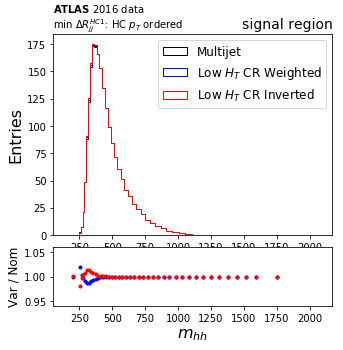

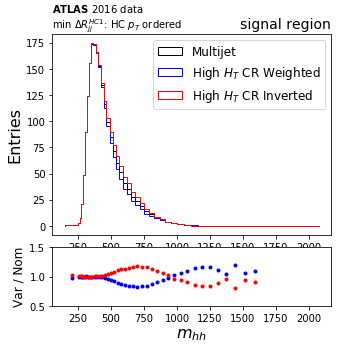

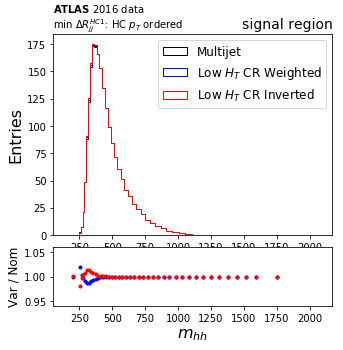

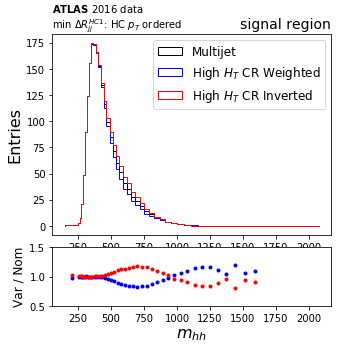

In [143]:
x = 0.5*(edges[:-1]+edges[1:])

var = {}

for log in [False,True]:

    for HT,tag,ylim in zip([(minR1_data16.HT < 300),(minR1_data16.HT >= 300)],
                           ['Low','High'],[(.94,1.06),(0.5,1.5)]):

        fig = plt.figure(figsize=(5, 5))
        gs = gridspec.GridSpec(4,1)
        ax1 = fig.add_subplot(gs[:3,0])
        ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)

        sb,_,_ = ax1.hist(minR1_data16.loc[bkg_SR,'m_hh'],
                          edges,color='k',histtype='step',log=False,
                          label='Multijet',
                          weights=minR1_data16.loc[bkg_SR,'w_2b'])

        cr,_,_ = ax1.hist(minR1_data16.loc[bkg_SR,'m_hh'],
                         edges,color='b',histtype='step',log=False,
                         label=f'{tag} $H_T$ CR Weighted',
                         weights=np.where(HT[bkg_SR],minR1_data16.loc[bkg_SR,'w_2b_CR'],minR1_data16.loc[bkg_SR,'w_2b']))


        inv,_,_ = ax1.hist(minR1_data16.loc[bkg_SR,'m_hh'],
                         edges,color='r',histtype='step',log=False,
                         label=f'{tag} $H_T$ CR Inverted',
                         weights=np.where(HT[bkg_SR],2*minR1_data16.loc[bkg_SR,'w_2b']-minR1_data16.loc[bkg_SR,'w_2b_CR'],
                                          minR1_data16.loc[bkg_SR,'w_2b']))

        ax2.plot(x,cr / sb,marker='.',color='blue',linewidth=0)
        ax2.plot(x,inv/sb,marker='.',color='r',linewidth=0)

        '''
        Append the histograms for the limits
        '''
        eps = 1e-15
        var[f'{tag}_HT'] = [list(cr+eps), list(np.nan_to_num((2-y)*sb)+eps)]

        ax2.set_xlabel('$m_{hh}$',fontsize=16)

        ax1.set_ylabel('Entries',fontsize=16)
        ax1.text(0,1,dataText,ha='left',va='bottom',transform=ax1.transAxes)

        ax2.set_ylabel('Var / Nom',fontsize=12)

        ax1.legend(fontsize=12)#,bbox_to_anchor=(1,1.05))
        ax1.set_title('signal region', loc='right',fontsize=14)

        ax2.set_ylim(ylim)

        plt.savefig('figures/vec_min_dRjj_h1/rw_2b_postXwt/m_hh_SR_{}_HT{}.pdf'.format(tag,"_log" if log else ""),bbox_inches='tight')


        plt.show()

Yey!! *Good enough for a first pass* (I guess.)

## Step 3: Get the limit with the background systematic

Ok, so does this mean there are now 4 more histograms that get added for low and high $H_T$, CR weighted + inverted?

Nope, I think it's just the two low and high $H_T$ ones using the Correlated Shape Systematic for the low and high variations.


In [66]:
s,_ = np.histogram(minR1_smnr.loc[sig_SR,'m_hh'],edges,
                   weights=minR1_smnr.loc[sig_SR,'mc_sf'])

s = np.where(s>0,s,0)

In [76]:
mi = bkgSyst(list(s), list(sb), var)

In [68]:
mi.spec

{'channels': [{'name': 'singlechannel',
   'samples': [{'name': 'signal',
     'data': [0.0,
      0.0,
      0.0,
      0.0007438011157593845,
      0.010267019341526675,
      0.014240591240457103,
      0.04849080948167899,
      0.03835366574190792,
      0.10949901885652671,
      0.14493083024572911,
      0.2294310278404867,
      0.23584693306448645,
      0.26226179442803643,
      0.27294304172409345,
      0.275947146013525,
      0.2514850124095387,
      0.2187957965734364,
      0.2400937183852756,
      0.1692135731950457,
      0.15466529024186482,
      0.13523947433892625,
      0.11391031173247512,
      0.096848646602687,
      0.08657441465021343,
      0.07614959304094127,
      0.05661883854235006,
      0.03931475578185717,
      0.036220460024126044,
      0.02498180402233441,
      0.019242814676733833,
      0.019267295118672312,
      0.010600431335386684,
      0.006796440919875746,
      0.004244162686530828,
      0.0021309768620847436,
      0.0010267170

In [69]:
data = mi.expected_data([0,0,0])

print('initialization parameters: {}'.format(mi.config.suggested_init()))

unconpars = pyhf.optimizer.unconstrained_bestfit(pyhf.utils.loglambdav, data, mi,
                                                 mi.config.suggested_init(), mi.config.suggested_bounds())
print('parameters post unconstrained fit: {}'.format(unconpars))


conpars = pyhf.optimizer.constrained_bestfit(pyhf.utils.loglambdav, 0, data, mi, 
                                             init_pars, par_bounds)
print('parameters post constrained fit: {}'.format(conpars))


initialization parameters: [1.0, 0.0, 0.0]
parameters post unconstrained fit: [ 0.00000000e+00 -1.74609718e-05  1.27284166e-06]
parameters post constrained fit: [ 0.00000000e+00 -1.09183923e-05  5.23890413e-07]


**Difference:** You fit the NPs assuming a certain value of $\mu$ or not.

**Question:** How do you get the uncertainty on the NP out of the fit?

**Could I plot the $m_{hh}$ histogram with the uncertainty indicated by a shaded histogram?**

Actually, I'm not 100% sure how I might do this clearly and honestly with the two different $H_T$ variations.


In [77]:
mus = np.linspace(1,80, 80)
alpha=.05

# Get the scan over mu
hypo_tests = [pyhf.utils.hypotest(mu, mi.expected_data([0,0,0]), mi,
                                  [0.5,0,0], [(0,np.max(mus)),(-5,5),(-5,5)],
                                  return_expected_set=True,
                                  return_test_statistics=True,
                                  qtilde=True) for mu in mus]

cls_exp = [np.array([test[1][i] for test in hypo_tests]).flatten() for i in range(5)]

# Invert the interval
var_band = [np.interp(alpha, list(reversed(y_vals)), list(reversed(mus)))
            for y_vals in cls_exp]


In [78]:
var_band

[17.07114115884464,
 23.059421171332477,
 32.305264750880674,
 45.47364859956672,
 61.74449101911152]

Ok, I was *thinking* about varying $X_{hh}$ and rederiving the limits, and combining the new pairing with $\Delta \eta_{hh}$ cateogrization, but it seems like the message here is really that we should abandon $\Delta R_{jj}^{HC1}$.

**Compare w/ the limit with the background model derived before the $X_{wt}$ cut**

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


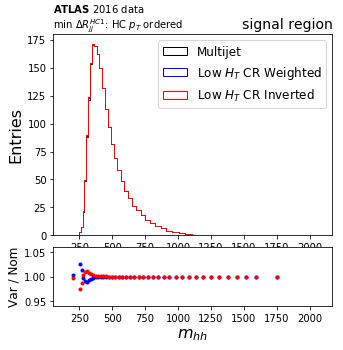

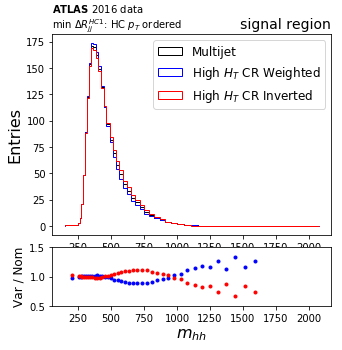

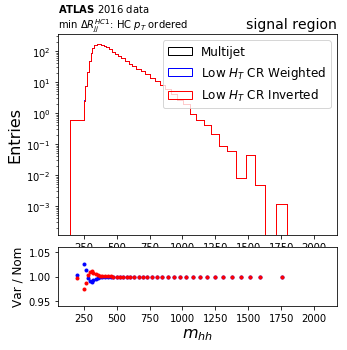

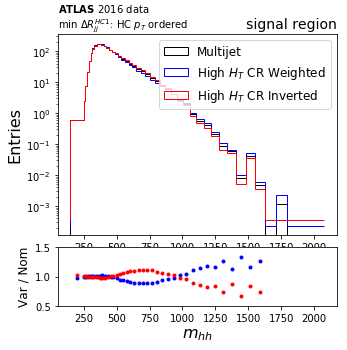

In [142]:
x = 0.5*(edges[:-1]+edges[1:])

var2 = {}

for log in [False,True]:

    for HT,tag,ylim in zip([(minR1_data16.HT < 300),(minR1_data16.HT >= 300)],
                           ['Low','High'],[(.94,1.06),(0.5,1.5)]):

        fig = plt.figure(figsize=(5, 5))
        gs = gridspec.GridSpec(4,1)
        ax1 = fig.add_subplot(gs[:3,0])
        ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)

        sb2,_,_ = ax1.hist(minR1_data16.loc[bkg_SR,'m_hh'],
                          edges,color='k',histtype='step',log=log,
                          label='Multijet',
                          weights=minR1_data16.loc[bkg_SR,'w_2b_preXwt'])

        cr,_,_ = ax1.hist(minR1_data16.loc[bkg_SR,'m_hh'],
                         edges,color='b',histtype='step',log=log,
                         label=f'{tag} $H_T$ CR Weighted',
                         weights=np.where(HT[bkg_SR],minR1_data16.loc[bkg_SR,'w_2b_CR'],minR1_data16.loc[bkg_SR,'w_2b_preXwt']))


        inv,_,_ = ax1.hist(minR1_data16.loc[bkg_SR,'m_hh'],
                         edges,color='r',histtype='step',log=log,
                         label=f'{tag} $H_T$ CR Inverted',
                         weights=np.where(HT[bkg_SR],2*minR1_data16.loc[bkg_SR,'w_2b_preXwt']-minR1_data16.loc[bkg_SR,'w_2b_CR'],
                                          minR1_data16.loc[bkg_SR,'w_2b_preXwt']))

        ax2.plot(x,cr / sb2,marker='.',color='blue',linewidth=0)
        ax2.plot(x,inv/sb2,marker='.',color='r',linewidth=0)

        '''
        Append the histograms for the limits
        '''
        eps = 1e-15
        var2[f'{tag}_HT'] = [list(cr+eps), list(np.nan_to_num((2-y)*sb)+eps)]

        ax2.set_xlabel('$m_{hh}$',fontsize=16)

        ax1.set_ylabel('Entries',fontsize=16)
        ax1.text(0,1,dataText,ha='left',va='bottom',transform=ax1.transAxes)

        ax2.set_ylabel('Var / Nom',fontsize=12)

        ax1.legend(fontsize=12)#,bbox_to_anchor=(1,1.05))
        ax1.set_title('signal region', loc='right',fontsize=14)

        ax2.set_ylim(ylim)

        plt.savefig('figures/vec_min_dRjj_h1/rw_2b_CRderiv/m_hh_SR_{}_HT{}.pdf'.format(tag,"_log" if log else ""),bbox_inches='tight')

        plt.show()

In [86]:
mj = bkgSyst(list(s), list(sb2), var2)

In [87]:
hypo_tests = [pyhf.utils.hypotest(mu, mj.expected_data([0,0,0]), mj,
                                  [0.5,0,0], [(0,np.max(mus)),(-5,5),(-5,5)],
                                  return_expected_set=True,
                                  return_test_statistics=True,
                                  qtilde=True) for mu in mus]

cls_exp = [np.array([test[1][i] for test in hypo_tests]).flatten() for i in range(5)]

# Invert the interval
var_band2 = [np.interp(alpha, list(reversed(y_vals)), list(reversed(mus)))
            for y_vals in cls_exp]

In [88]:
var_band2

[12.726708833897119,
 17.13720000206881,
 23.93116745290743,
 33.596947018366315,
 45.483401486204464]

In [89]:
var_band

[17.07114115884464,
 23.059421171332477,
 32.305264750880674,
 45.47364859956672,
 61.74449101911152]

**No way!!!** The real lesson from this exercise was that it was really important to do the weighting before $X_{wt}$ to avoid these stripes!

In [98]:
xsec = 31.05

stdText = '$\mathbf{ATLAS}$ Internal 2016 data\n'
stdText += r'$\sigma_{ggF}(pp \rightarrow HH)$ = '
stdText += "{:.2f} fb\n".format(xsec)
stdText += 'min $\Delta R_{jj}^{HC1}$ pairing'
stdText += '\nLimit with bkg syst'

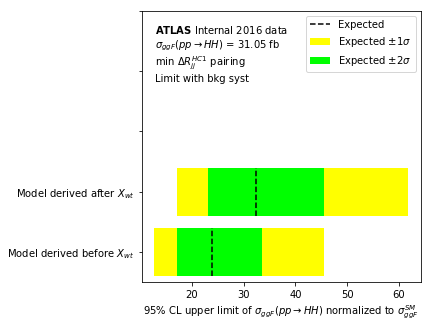

In [141]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

labels = [
    'Model derived after $X_{wt}$',
    'Model derived before $X_{wt}$'
]

eps = .1

exp_bands = [var_band,var_band2]


for i,(ymin, cls_exp) in enumerate(zip(np.arange(len(labels))[::-1],
                                       exp_bands)):
    
    plt.fill_between([cls_exp[0],cls_exp[-1]], [ymin+eps]*2,[ymin+1-eps]*2, 
                     facecolor = 'yellow', 
                     label='Expected $\pm 1\sigma$' if i==0 else None)
    plt.fill_between([cls_exp[1],cls_exp[-2]], [ymin+eps]*2,[ymin+1-eps]*2, 
                     facecolor = 'lime', 
                     label='Expected $\pm 2\sigma$' if i==0 else None)
    
    plt.plot([cls_exp[2]]*2,[ymin+eps,ymin+1-eps],'k--',
             label='Expected' if i==0 else None)
       
ax.set_yticks(np.arange(5)+0.5)
ax.set_yticklabels(labels[::-1])   
 
'''
Put some text on the top of the figure corresponding 
to the signal that we're looking at.
'''
plt.ylim(0,)
plt.text(0.05,0.95,stdText,ha='left',va='top',transform=ax.transAxes)
plt.legend(loc='upper right')
    
plt.xlabel(r'95% CL upper limit of $\sigma_{ggF}(pp \rightarrow HH)$ normalized to $\sigma_{ggF}^{SM}$')

plt.savefig('figures/vec_min_dRjj_h1/rw_2b_CRderiv/smnr_bkgSys_cf_postXwt.pdf',bbox_inches='tight')

plt.show()

Ok, let's also compare against the background systematic I got in the other notebook.

In [100]:
baseline = [13.193567270760052,
             17.75442009646648,
             24.735206797892534,
             34.60720897887133,
             46.699967909791646]

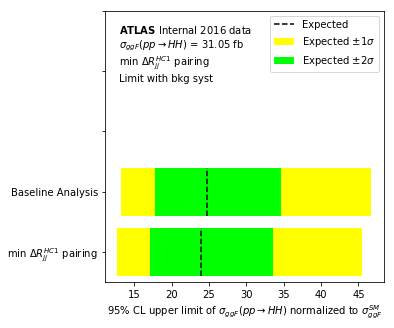

In [140]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

labels = [
    'Baseline Analysis',
    'min $\Delta R_{jj}^{HC1}$ pairing'
]

eps = .1

exp_bands = [baseline,var_band2]


for i,(ymin, cls_exp) in enumerate(zip(np.arange(len(labels))[::-1],
                                       exp_bands)):
    
    plt.fill_between([cls_exp[0],cls_exp[-1]], [ymin+eps]*2,[ymin+1-eps]*2, 
                     facecolor = 'yellow', 
                     label='Expected $\pm 1\sigma$' if i==0 else None)
    plt.fill_between([cls_exp[1],cls_exp[-2]], [ymin+eps]*2,[ymin+1-eps]*2, 
                     facecolor = 'lime', 
                     label='Expected $\pm 2\sigma$' if i==0 else None)
    
    plt.plot([cls_exp[2]]*2,[ymin+eps,ymin+1-eps],'k--',
             label='Expected' if i==0 else None)
       
ax.set_yticks(np.arange(5)+0.5)
ax.set_yticklabels(labels[::-1])   
 
'''
Put some text on the top of the figure corresponding 
to the signal that we're looking at.
'''
plt.ylim(0,)
plt.text(0.05,0.95,stdText,ha='left',va='top',transform=ax.transAxes)
plt.legend(loc='upper right')
    
plt.xlabel(r'95% CL upper limit of $\sigma_{ggF}(pp \rightarrow HH)$ normalized to $\sigma_{ggF}^{SM}$')

plt.savefig('figures/vec_min_dRjj_h1/rw_2b_CRderiv/smnr_bkgSys_cf_baseline.pdf',bbox_inches='tight')

plt.show()

In [136]:
var_band2[2]

23.93116745290743

In [108]:
(baseline[2]-var_band2[2])/baseline[2]*100

3.250586710492383

Ok, now only 3% better...

*What if I varied $X_{hh}$... like Michael suggested?*

Recall - the formula for our SR definition is

$$X_{HH} = \sqrt{\left(\frac{m_{2j}^{lead}-120}{0.1 m_{2j}^{lead}}\right)^2 +\left(\frac{m_{2j}^{subl}-110}{0.1 m_{2j}^{subl}}\right)^2} < 1.6$$

In [114]:
for df in [minR1_smnr,minR1_data16]:
    
    df['Xhh'] = 10*np.sqrt(np.power((df.m_h1-120)/df.m_h1,2)+np.power((df.m_h2-110)/df.m_h2,2))
    

So, I think the idea here is, how can we vary the radius for the SR to optimize the significance?  Since I have the full background estimate, I think this is a fairly straightforward study for me to do using the full background estimate.

In [115]:
cuts = np.linspace(.5,2,16)

In [116]:
cuts

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. ])

In [117]:
zs = []

for cut in cuts:
    
    mask_4b = (minR1_smnr.ntag >= 4) & (minR1_smnr.Xhh < cut)
    mask_2b = (minR1_data16.ntag == 2) & (minR1_data16.Xhh < cut)
    
    si,_ = np.histogram(minR1_smnr.loc[mask_4b,'m_hh'],  edges,weights=minR1_smnr.loc[mask_4b,'mc_sf'])
    bi,_ = np.histogram(minR1_data16.loc[mask_2b,'m_hh'],edges,weights=minR1_data16.loc[mask_2b,'w_2b_preXwt'])
 
    zs.append( np.sqrt(np.sum((np.power(si,2) / bi)[bi>0])))
    

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


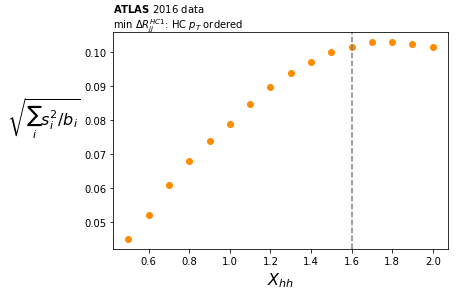

In [139]:
plt.plot(cuts,zs,marker='o',color='darkorange',linewidth=0)

ax = plt.gca()
plt.text(0,1,dataText,transform=ax.transAxes)
plt.xlabel('$X_{hh}$',fontsize=16)
plt.ylabel(r'$\sqrt{\sum_i s_i^2 / b_i}$',fontsize=16,
           rotation=0,labelpad=40)

ylim = plt.ylim()
plt.plot([1.6]*2,ylim,'grey',linestyle='--')
plt.ylim(ylim)

plt.savefig('figures/vec_min_dRjj_h1/rw_2b/significance_Xhh.pdf',bbox_inches='tight')

plt.show()

In [135]:
zs[-5]

0.10154538630160904

Ok, so the message from this plot is that tightening $X_{hh}$ won't help for our limit.

In [132]:
# Sanity check
np.min(minR1_smnr.loc[sig_SR,"Xhh"]),np.max(minR1_smnr.loc[sig_SR,"Xhh"])

(0.004530170661374771, 1.599970545344237)

Yep, I implemented the variable correctly.

Last sanity check: Stats limit with these histograms.

In [137]:
mk = simple(list(s), list(sb2))
    
# Do the fit
# Get the scan over mu
hypo_tests = [pyhf.utils.hypotest(mu, mk.expected_data([0]), mk,
                                  [0.5], [(0,np.max(mus))],
                                  return_expected_set=True,
                                  return_test_statistics=True,
                                  qtilde=True) for mu in mus]

cls_exp = [np.array([test[1][i] for test in hypo_tests]).flatten() for i in range(5)]

stat_band = [np.interp(alpha, list(reversed(y_vals)), list(reversed(mus)))
             for y_vals in cls_exp]

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:184: RuntimeWarning: divide by zero encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:184: RuntimeWarning: invalid value encountered in multiply
  return n * np.log(lam) - lam - gammaln(n + 1.0)


In [138]:
stat_band

[10.533280935439779,
 14.170841892215929,
 19.79924068528278,
 27.803428274690063,
 37.694924419621]